# Team Members
- 22127148 - Dương Nhật Huy
- 22127224 - Trương Thuận Kiệt
- 22127257 - Phạm Minh Mẫn

# Table of contents
1. [Libraries](#libraries)
2. [Overview of dataset](#overview-of-dataset)
3. [Preprocessing data](#preprocessing)
4. [Questions](#questions)
    - [Question 1](#question-1)
    - [Question 2](#question-2)
    - [Question 3](#question-3)
5. [Conclusion](#conclusion)
    - [Difficulties during the project](#difficulties)
    - [Useful things learned](#useful)
    - [Plans to improve if have more time](#plans)
6. [References](#references)


<div id = "libraries">
<h2>1. Libraries</h2>
<p>Import necessary libraries to use</p> 
</div>

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from plotly.subplots import make_subplots
# import plotly.graph_objs as go


<div id="overview-of-dataset"> <h2>2. Overview of dataset</h2> </div>
Provide an overview of the dataset.

In [254]:
data = pd.read_csv('./Data/healthcare-dataset-stroke-data.csv')

In [100]:
data.head() 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<h3> Number of rows and cols </h3>

In [101]:
print("Number of rows: ", len(data))

Number of rows:  5110


In [102]:
print("Number of columns: ", len(data.columns))

Number of columns:  12


<h3> Meaning of each row </h3>

Each row will represent each patient's medical record of stroke with some features relating to that patient.

After looking into the entire data of file csv, it can be seen there are no abnormal rows.

<h3> Duplicated rows </h3>

In [103]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


So can be seen that there is no duplicates

<h3> Meaning of each column </h3>

In [104]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- Here is the description of each column:
    - **id**: id of each patient
    - **gender**: each patient's gender can be male, female and other
    - **age**: how old is each patient
    - **hypertension**: when the pressure in blood is too high
    - **heart_disease**:  when the patient have disease relates to heart
    - **ever_married**: whether the patient is or used to be married
    - **work_type**: the job status of the patient
    - **Residence_type**: the area that patients live
    - **avg_glucose_level**: the level of sugar in the blood
    - **bmi**: measure of body fat based on height and weight
    - **smoking_status**: whether the patient is smoking or not
    - **stroke**: whether the patient got stroke or not

- Unique values and value range of each column

In [105]:
# Unique values in each column
print("Unique values of gender: ", data['gender'].unique())
print("Unique values of hypertension: ", data['hypertension'].unique())
print("Unique values of heart_disease: ", data['heart_disease'].unique())
print("Unique values of ever_married: ", data['ever_married'].unique())
print("Unique values of work_type: ", data['work_type'].unique())
print("Unique values of Residence_type: ", data['Residence_type'].unique())
print("Unique values of smoking_status: ", data['smoking_status'].unique())
print("Unique values of stroke: ", data['stroke'].unique())

Unique values of gender:  ['Male' 'Female' 'Other']
Unique values of hypertension:  [0 1]
Unique values of heart_disease:  [1 0]
Unique values of ever_married:  ['Yes' 'No']
Unique values of work_type:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values of Residence_type:  ['Urban' 'Rural']
Unique values of smoking_status:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Unique values of stroke:  [1 0]


- So we can see unique values of each column:
    - **gender**: Male, Female, Other
    - **heart_disease**: 0: No, 1: Yes
    - **ever_married**: Yes, No
    - **work_type**: Private, Self-employed, Govt_job, children, Never_worked
    - **Residence_type**: Urban, Rural
    - **smoking_status**: formerly smoked, never smoked, smokes, Unknown
    - **stroke**: 1: Yes, 0: No

In [106]:
# Range values of age, avg_glucose_level, bmi
print("Range of age: ", data['age'].min(), " - ", data['age'].max())
print("Range of avg_glucose_level: ", data['avg_glucose_level'].min(), " - ", data['avg_glucose_level'].max())
print("Range of bmi: ", data['bmi'].min(), " - ", data['bmi'].max())

Range of age:  0.08  -  82.0
Range of avg_glucose_level:  55.12  -  271.74
Range of bmi:  10.3  -  97.6


- Range values:
    - **age**: 0.08-82.0
    - **avg_glucose_level**: 55.12 - 271.74
    - **bmi**: 10.3 - 97.6

=> As we see, age value got float values and needs to be corrected to integer in Data Processing

<h3>Current data type of each column</h3>

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- Look like all data type of each column is correct, except from age type is currently float

In [108]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<h3>Numerical columns exploration</h3>

<h4> Age column </h4>

- Distribution of values

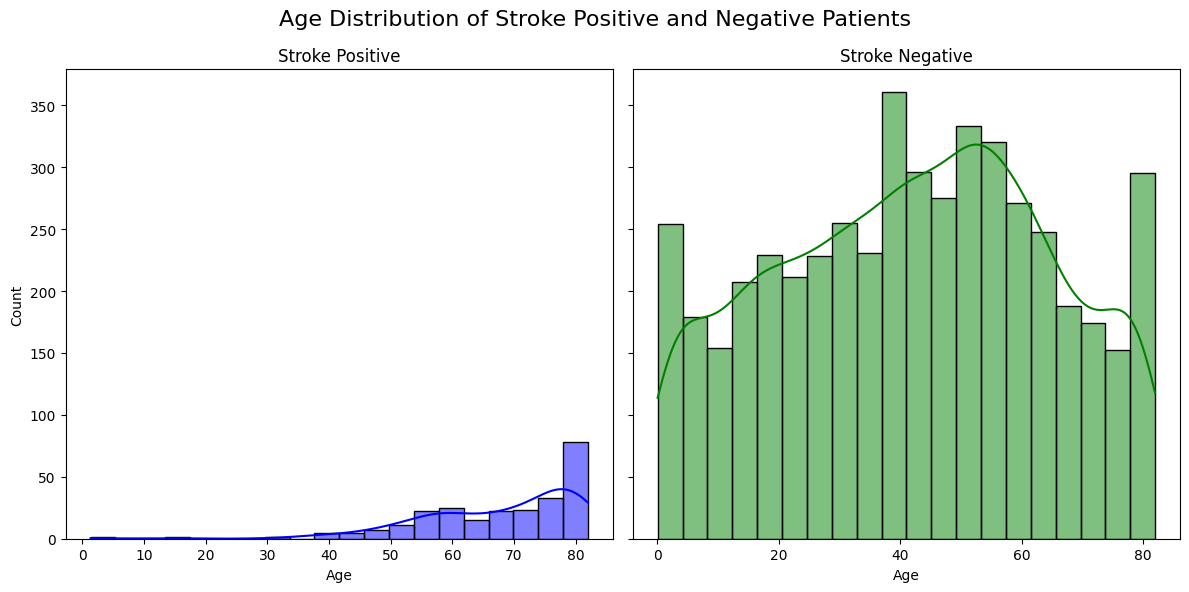

In [109]:
# With each numerical column, how are values distributed?
# Age
# Analysis of Stroke positive and negative patients
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plotting Age Distribution for Stroke Positive patients
sns.histplot(stroke_positive['age'], bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel('Age')

# Plotting Age Distribution for Stroke Negative patients
sns.histplot(stroke_negative['age'], bins=20, kde=True, color="green", ax=axes[1])
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel('Age')

# Set the main title
plt.suptitle("Age Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

- Percentage of missing values

In [110]:
print("Percentage of missing values in age: ", (data['age'].isnull().sum() / len(data)) * 100)

Percentage of missing values in age:  0.0


- Min/Max

In [111]:
print("Min/Max age of stroke positive patients: ", stroke_positive['age'].min(), stroke_positive['age'].max())

Min/Max age of stroke positive patients:  1.32 82.0


&rarr; **Age as a Risk Factor**: The data clearly indicates that the incidence of strokes rises significantly with age, especially after 50 years, aligning with known medical research that strokes are more common in older populations.

&rarr; **Skewed Distribution for Positive Cases**: The left graph's distribution highlights that strokes are quite rare in younger patients but become more prevalent after middle age.


<h4>Hypertension Column</h4>

- Distribution of values

C:\Users\DELL\AppData\Local\Temp\ipykernel_7212\3203346343.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_positive['hypertension'], palette="Blues", ax=axes[0])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7212\3203346343.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_negative['hypertension'], palette="Greens", ax=axes[1])


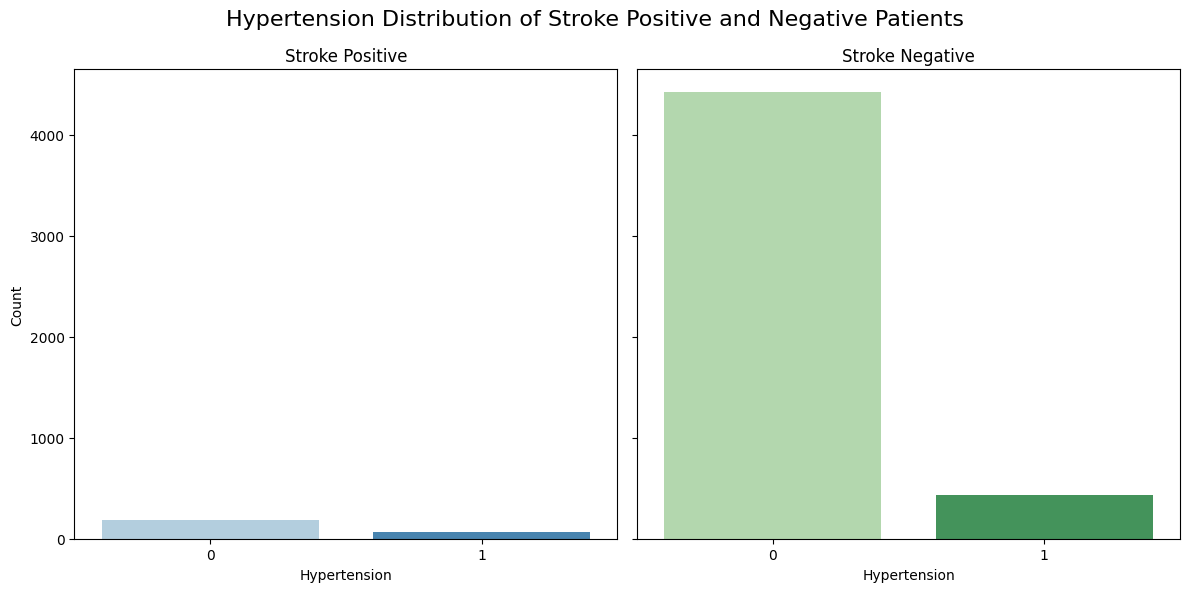

In [112]:
# Hypertension
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plotting Hypertension Distribution for Stroke Positive patients
sns.countplot(x='hypertension', hue='hypertension', palette="Blues", data=stroke_positive, ax=axes[0], legend=False)
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel('Hypertension')
axes[0].set_ylabel('Count')

# Create a custom legend for the Stroke Positive plot
handles_positive = [plt.Line2D([0], [0], color="lightblue", lw=4),
                    plt.Line2D([0], [0], color="blue", lw=4)]
axes[0].legend(handles_positive, ['No History', 'History'], title='Hypertension')

# Plotting Hypertension Distribution for Stroke Negative patients
sns.countplot(x='hypertension', hue='hypertension', palette="Greens", data=stroke_negative, ax=axes[1], legend=False)
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel('Hypertension')

# Create a custom legend for the Stroke Negative plot
handles_negative = [plt.Line2D([0], [0], color="lightgreen", lw=4),
                    plt.Line2D([0], [0], color="green", lw=4)]
axes[1].legend(handles_negative, ['No History', 'History'], title='Hypertension')

# Set the main title
plt.suptitle("Hypertension Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


- Percentage of missing values

In [268]:
print("Percentage of missing values in hypertension: ", (data['hypertension'].isnull().sum() / len(data)) * 100)

Percentage of missing values in hypertension:  0.0


- Min/Max

In [269]:
print("Min/Max hypertension of stroke positive patients: ", stroke_positive['hypertension'].min(), stroke_positive['hypertension'].max())

Min/Max hypertension of stroke positive patients:  0 1


&rarr; In both stroke-positive and stroke-negative populations, **hypertension is not overwhelmingly present**. Most patients, regardless of stroke status, do not have a history of hypertension. However, it is important to note that patients with a history of hypertension are more common in the stroke-negative group

&rarr; Hypertension does not appear to be the sole or dominant factor contributing to stroke

4


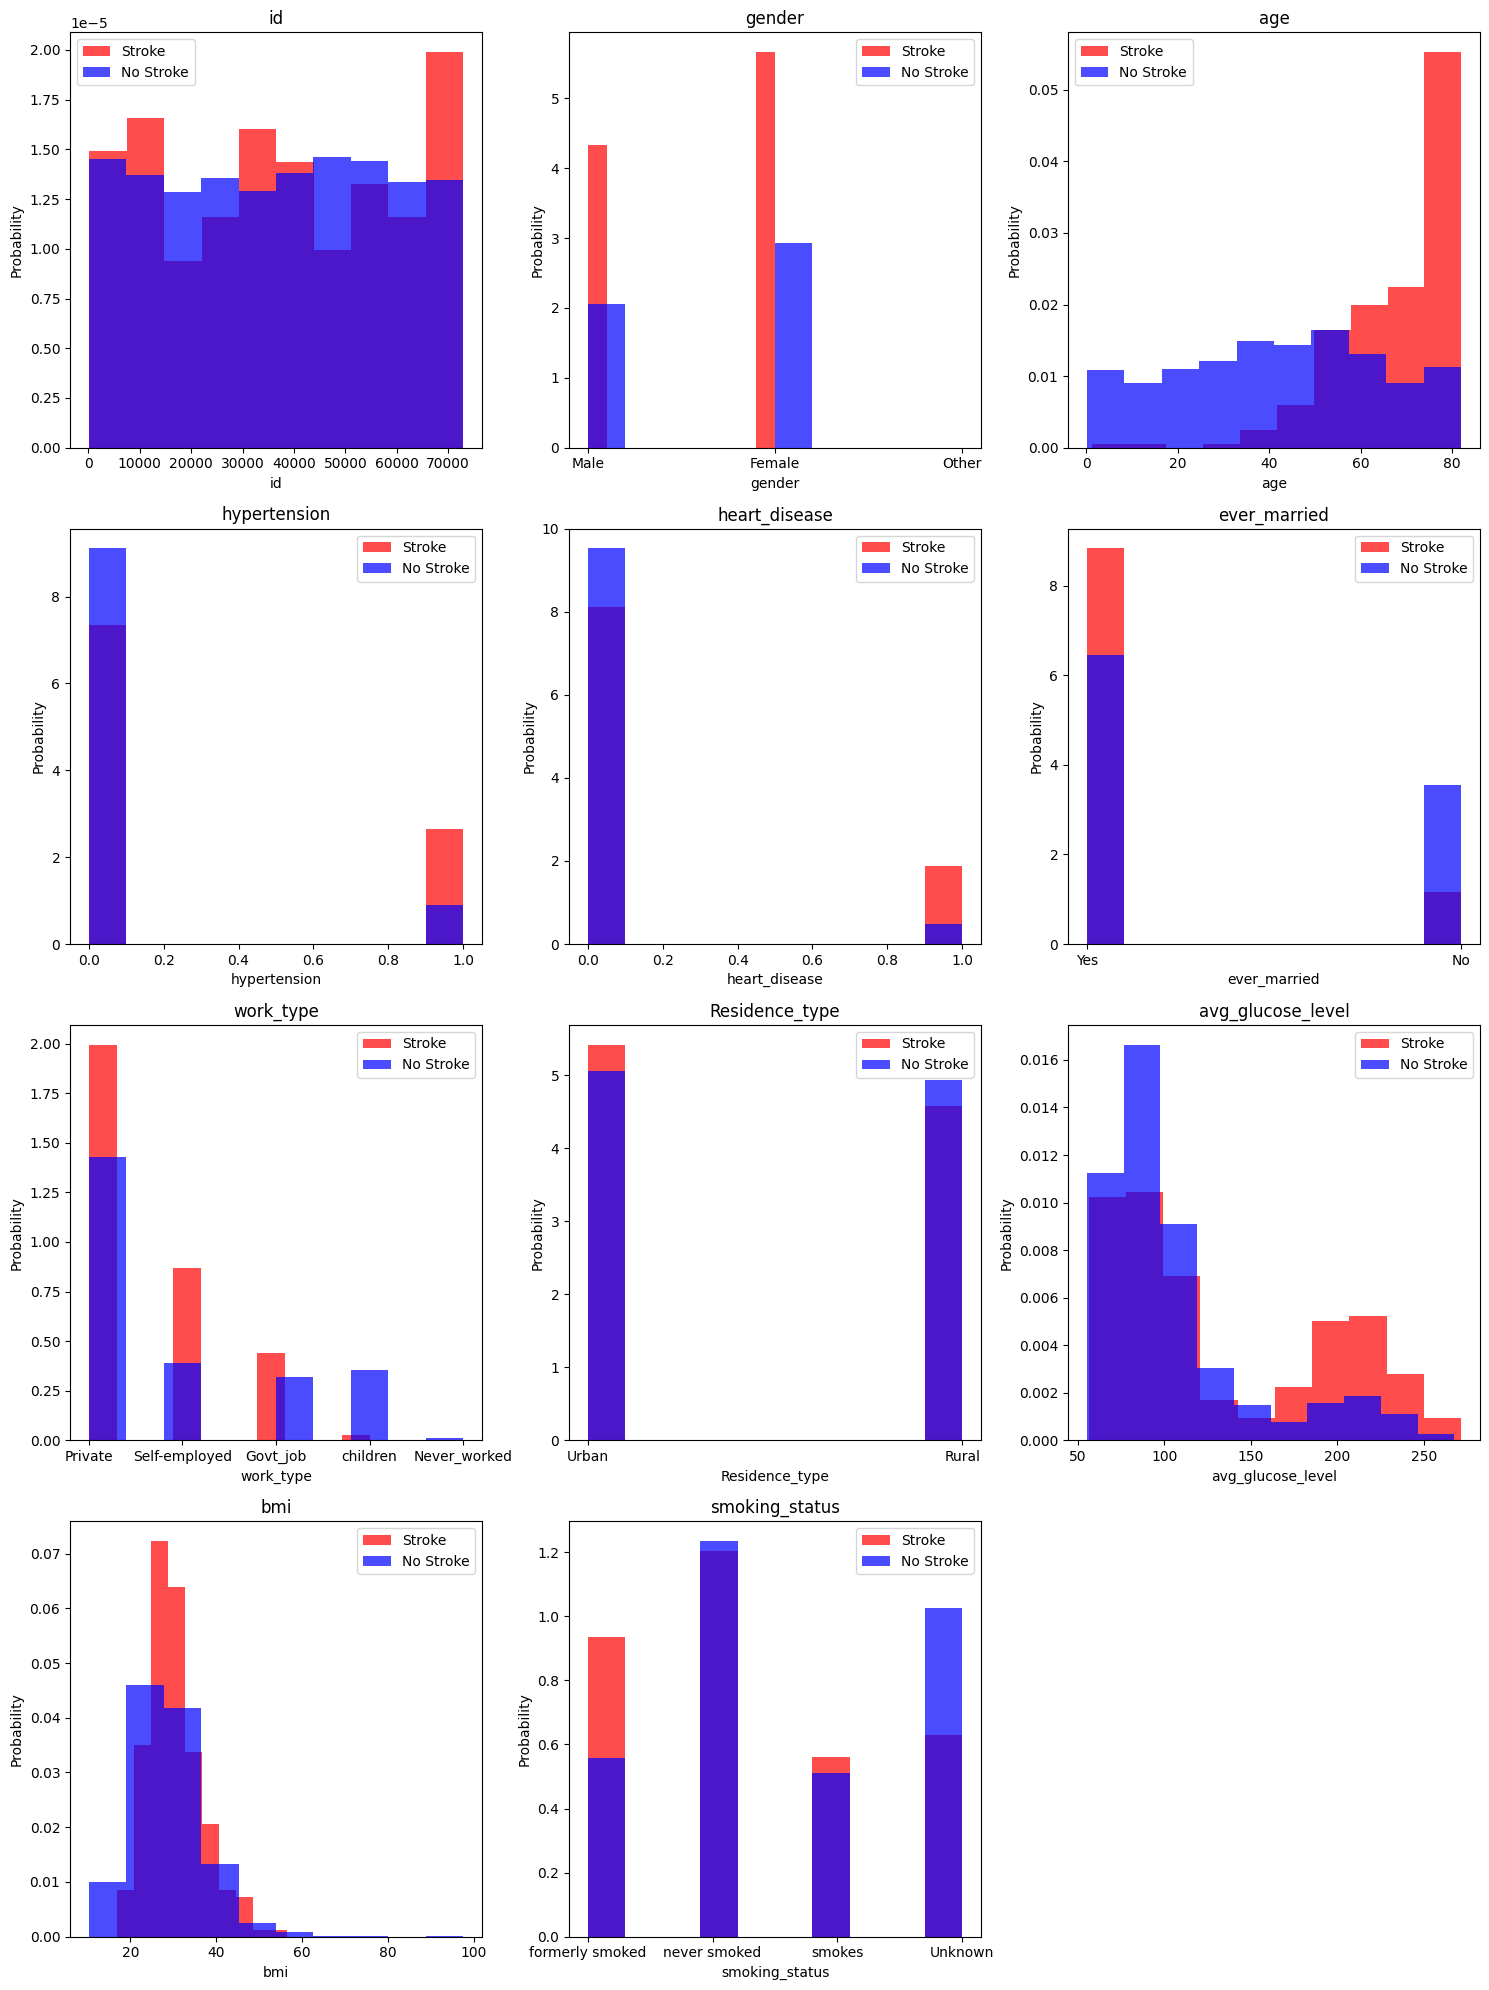

In [113]:
# cols = data.columns
# for label in cols[:-1]:
#   plt.hist(data[data['stroke']==1][label], color='blue', label='Stroke', alpha=0.7, density=True)
#   plt.hist(data[data["stroke"]==0][label], color='red', label='No Stroke', alpha=0.7, density=True)
#   plt.title(label)
#   plt.ylabel("Probability")
#   plt.xlabel(label)
#   plt.legend()
#   plt.show()


cols = data.columns
n_cols = 3
n_rows = 4

print(n_rows)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for idx, label in enumerate(cols[:-1]):
    axes[idx].hist(data[data['stroke'] == 1][label], color='red', label='Stroke', alpha=0.7, density=True)
    axes[idx].hist(data[data['stroke'] == 0][label], color='blue', label='No Stroke', alpha=0.7, density=True)
    axes[idx].set_title(label)
    axes[idx].set_ylabel("Probability")
    axes[idx].set_xlabel(label)
    axes[idx].legend()

for ax in axes[len(cols) - 1:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

<div id = "preprocessing"><h2>3. Preprocessing data </h2></div>

In [114]:
# Drop id column
# data = data.drop('id', axis=1)
# Encoding categorical data
# data['gender'] = data['gender'].replace({'Male':0, 'Female':1, 'Other':2})
# data['ever_married'] = data['ever_married'].replace({'No':0, 'Yes':1})
# data['work_type'] = data['work_type'].replace({'children':0, 'Never_worked':1, 'Govt_job':2, 'Private':3, 'Self-employed':4})
# data['Residence_type'] = data['Residence_type'].replace({'Rural':0, 'Urban':1})
# data['smoking_status'] = data['smoking_status'].replace({'Unknown':0, 'never smoked':1, 'formerly smoked':2, 'smokes':3})

gender_dict = {'Male' : 0, 'Female' : 1, 'Other' : 2}
married_dict = {'No' : 0, 'Yes' : 1}
work_type_dict = {'children' : 0, 'Never_worked' : 1, 'Govt_job' : 2, 'Private' : 3, 'Self-employed':4}
residence_type_dict = {'Rural' : 0, 'Urban' : 1}
smoking_dict = {'Unknown' : 0, 'never smoked' : 1, 'formerly smoked' : 2, 'smokes' : 3}

def category_encoder(label, value_dict):
    if label in value_dict:
        return value_dict[label]
    else:
        return -1

data['gender'] = data['gender'].apply(category_encoder, args=(gender_dict,))
data['ever_married'] = data['ever_married'].apply(category_encoder, args=(married_dict,))
data['work_type'] = data['work_type'].apply(category_encoder, args=(work_type_dict,))
data['Residence_type'] = data['Residence_type'].apply(category_encoder, args=(residence_type_dict,))
data['smoking_status'] = data['smoking_status'].apply(category_encoder,args=(smoking_dict,))

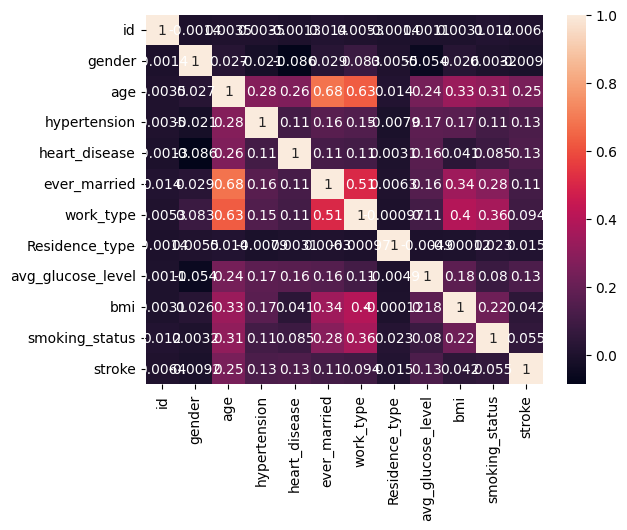

In [115]:
# Check correlation between numerical features
corr = data.corr()
sns.heatmap(corr, annot=True);

<div id = "questions"> <h2> 4. Questions </h2> </div>

<div id = "question-1"> <h3>4.1. Question 1 </h3></div>

<div id = "question-2"> <h3>4.2. Question 2 </h3></div>

<div id = "question-3"> <h3>4.3. Question 3 </h3></div>

<div id = "conclusion"> <h2> 5. Conclusion </h2> </div>

<div id = "difficulties"> <h3>5.1. Difficulties during the project </h3></div>

<div id = "useful"> <h3>5.2. Useful things learned</h3></div>

<div id = "plans"> <h3>5.3. Plans to improve if have more time</h3></div>

<div id = "references"> <h2>6. References</h2></div>